In [1]:
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib import pyplot as plt
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import numpy as np
import warnings as wn
%load_ext autoreload
%autoreload 2
import esm2m.myfunctions as func

In [2]:
rootdir = '/local/ss23/GFDL_LEs/'
experiment = 'OCN/METABOLIC_INDEX/RCP26'
filename = 'MI_hitemp_sens_k01_ens*_1x1_2006_2100.nc'
path = rootdir+experiment+'/'+filename
ds_all26 = xr.open_mfdataset(path, engine='netcdf4', concat_dim='ensemble', combine='nested')

In [3]:
experiment = 'OCN/METABOLIC_INDEX/RCP85'
filename = 'MI_hitemp_sens_k01_ens*_1x1_1950_2100.nc'
path = rootdir+experiment+'/'+filename
ds_all85 = xr.open_mfdataset(path, engine='netcdf4', concat_dim='ensemble', combine='nested')
ds_all85 = ds_all85.sel(time=slice('2006-01-01','2100-12-31'))

In [4]:
ds_avg26 = ds_all26.sel(ensemble=30)
ds_avg85 = ds_all85.sel(ensemble=30)

SPATIAL MAPS

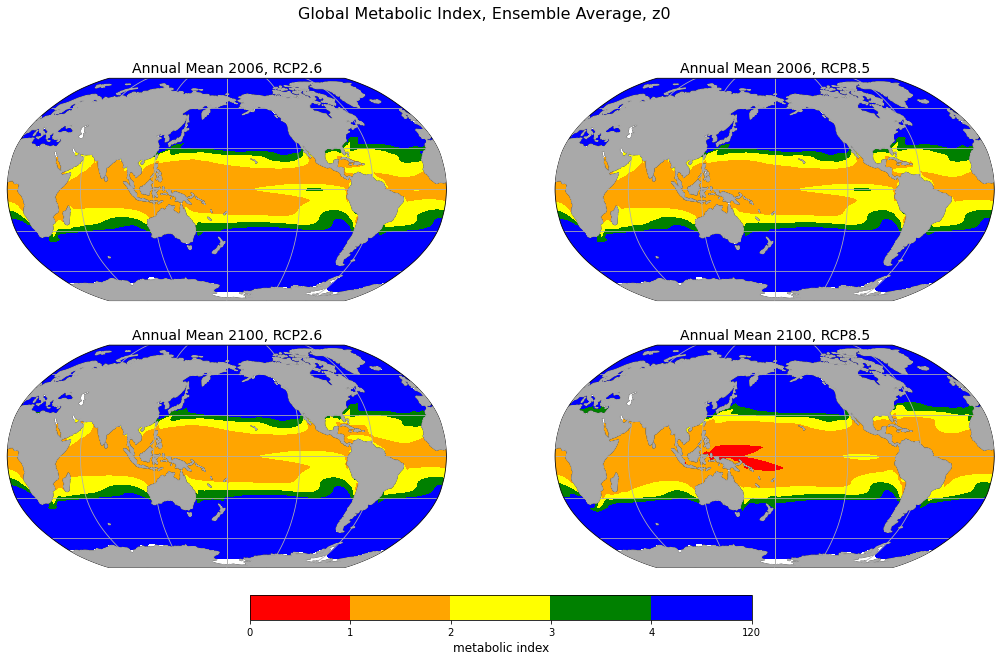

In [6]:
fig, axs = plt.subplots(figsize=(18,10), ncols=2, nrows=2, subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('Global Metabolic Index, Ensemble Average, z0', fontsize=16)
wn.filterwarnings('ignore')
func.graph(ds_avg26, axs[0,0], 'Annual Mean 2006, RCP2.6', 2006, None, True)
func.graph(ds_avg85, axs[0,1], 'Annual Mean 2006, RCP8.5', 2006, None, True)
func.graph(ds_avg26, axs[1,0], 'Annual Mean 2100, RCP2.6', 2100, None, True)
im = func.graph(ds_avg85, axs[1,1], 'Annual Mean 2100, RCP8.5', 2100, None, True)
cbar = plt.colorbar(im,ax=axs,orientation='horizontal',fraction=0.05,pad=0.05,shrink=0.5)
cbar.set_label('metabolic index',fontsize=12)

PERCENT AREA

In [19]:
total = func.get_total(ds_all26)
totalN = 20466
totalS = 22744

In [17]:
def get_percent(ds_all, mi, tot):
    ds = ~np.isnan(ds_all.where(ds_all['MI']<mi))
    ds_sum = ds['MI'].sum(dim='xt_ocean').sum(dim='yt_ocean')
    ds_percent = (ds_sum/tot)*100
    ds_avg = ds_percent.sel(ensemble=slice(0,29)).mean(dim='ensemble')
    return ds_avg

In [8]:
ds_r26 = get_percent(ds_all26, 1.0, total)
ds_o26 = get_percent(ds_all26, 2.0, total)
ds_y26 = get_percent(ds_all26, 3.0, total)
ds_g26 = get_percent(ds_all26, 4.0, total)

In [9]:
r26_S = get_percent(ds_all26.sel(yt_ocean=slice(-89.5,0)), 1.0, totalS)
r26_N = get_percent(ds_all26.sel(yt_ocean=slice(0,89.5)), 1.0, totalN)
o26_S = get_percent(ds_all26.sel(yt_ocean=slice(-89.5,0)), 2.0, totalS)
o26_N = get_percent(ds_all26.sel(yt_ocean=slice(0,89.5)), 2.0, totalN)
y26_S = get_percent(ds_all26.sel(yt_ocean=slice(-89.5,0)), 3.0, totalS)
y26_N = get_percent(ds_all26.sel(yt_ocean=slice(0,89.5)), 3.0, totalN)

In [10]:
r85_S = get_percent(ds_all85.sel(yt_ocean=slice(-89.5,0)), 1.0, totalS)
r85_N = get_percent(ds_all85.sel(yt_ocean=slice(0,89.5)), 1.0, totalN)
o85_S = get_percent(ds_all85.sel(yt_ocean=slice(-89.5,0)), 2.0, totalS)
o85_N = get_percent(ds_all85.sel(yt_ocean=slice(0,89.5)), 2.0, totalN)
y85_S = get_percent(ds_all85.sel(yt_ocean=slice(-89.5,0)), 3.0, totalS)
y85_N = get_percent(ds_all85.sel(yt_ocean=slice(0,89.5)), 3.0, totalN)

In [11]:
ds_r85 = get_percent(ds_all85, 1.0, total)
ds_o85 = get_percent(ds_all85, 2.0, total)
ds_y85 = get_percent(ds_all85, 3.0, total)
ds_g85 = get_percent(ds_all85, 4.0, total)

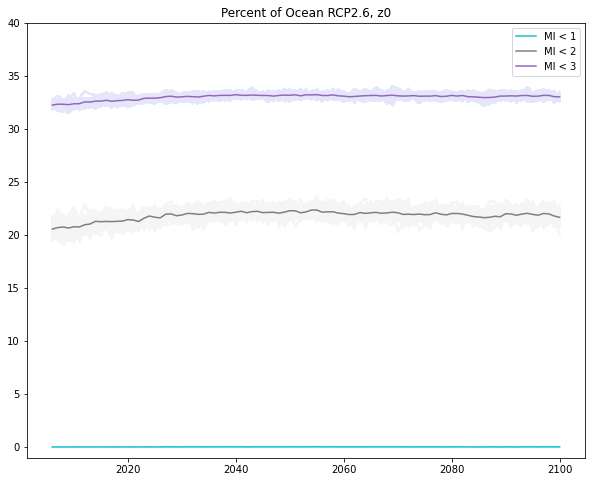

In [51]:
fig, ax = plt.subplots(figsize=(10,8))
# func.percent_plot(ds_z0avg,ax,'RCP8.5 Ensemble Average Annual Means, k01',True,True,True,None,None,'k01', total)
func.plot_allEns(ds_all26, 1.0, ax, 'lightcyan', total)
func.plot_allEns(ds_all26, 2.0, ax, 'whitesmoke', total)
func.plot_allEns(ds_all26, 3.0, ax, 'lavender', total)
ax.plot(np.unique(ds_r26['time.year']),ds_r26.groupby('time.year').mean(),color='tab:cyan',label='MI < 1')
ax.plot(np.unique(ds_o26['time.year']),ds_o26.groupby('time.year').mean(),color='tab:gray',label='MI < 2')
ax.plot(np.unique(ds_y26['time.year']),ds_y26.groupby('time.year').mean(),color='tab:purple',label='MI < 3')
# ax0.plot(np.unique(ds_g26['time.year']),ds_g26.groupby('time.year').mean(),color='navy',label='MI < 4')
ax.set_ylim(-1, 40)
ax.set_title('Percent of Ocean RCP2.6, z0')
ax.legend()

(-1.0, 40.0)

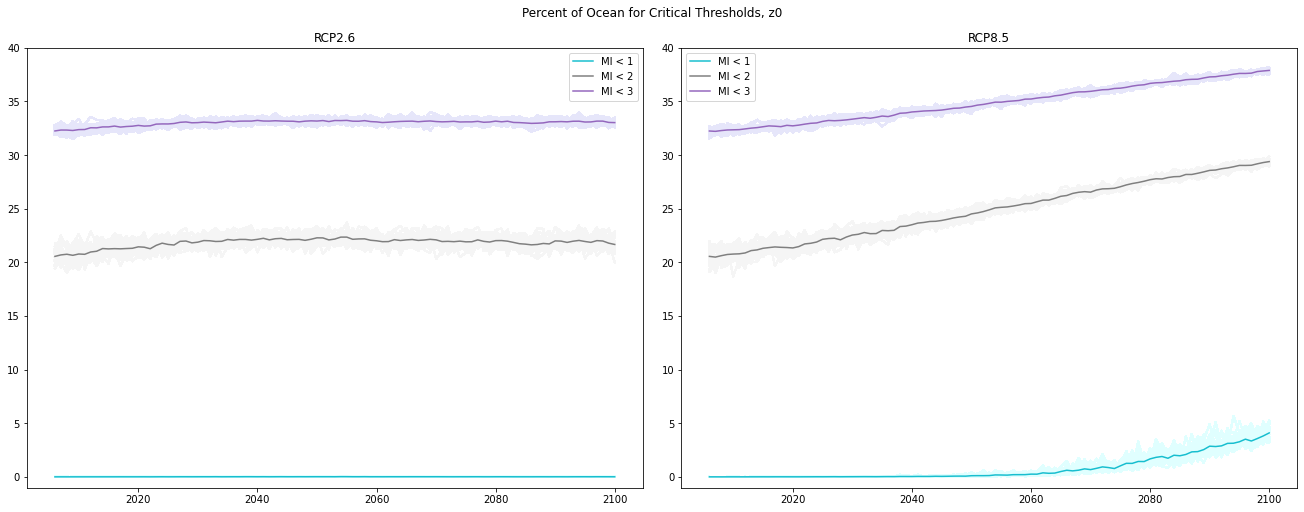

In [52]:
fig, (ax0, ax1) = plt.subplots(figsize=(18,7), ncols=2, constrained_layout=True)
fig.suptitle('Percent of Ocean for Critical Thresholds, z0')
# func.percent_plot(ds_z0avg,ax,'RCP8.5 Ensemble Average Annual Means, k01',True,True,True,None,None,'k01', total)
func.plot_allEns(ds_all26, 1.0, ax0, 'lightcyan', total)
func.plot_allEns(ds_all26, 2.0, ax0, 'whitesmoke', total)
func.plot_allEns(ds_all26, 3.0, ax0, 'lavender', total)
ax0.plot(np.unique(ds_r26['time.year']),ds_r26.groupby('time.year').mean(),color='tab:cyan',label='MI < 1')
ax0.plot(np.unique(ds_o26['time.year']),ds_o26.groupby('time.year').mean(),color='tab:gray',label='MI < 2')
ax0.plot(np.unique(ds_y26['time.year']),ds_y26.groupby('time.year').mean(),color='tab:purple',label='MI < 3')
# ax0.plot(np.unique(ds_g26['time.year']),ds_g26.groupby('time.year').mean(),color='navy',label='MI < 4')
ax0.set_ylim(-1, 40)
ax0.set_title('RCP2.6')
ax0.legend()
func.plot_allEns(ds_all85, 1.0, ax1, 'lightcyan', total)
func.plot_allEns(ds_all85, 2.0, ax1, 'whitesmoke', total)
func.plot_allEns(ds_all85, 3.0, ax1, 'lavender', total)
ax1.plot(np.unique(ds_r85['time.year']),ds_r85.groupby('time.year').mean(),color='tab:cyan',label='MI < 1')
ax1.plot(np.unique(ds_o85['time.year']),ds_o85.groupby('time.year').mean(),color='tab:gray',label='MI < 2')
ax1.plot(np.unique(ds_y85['time.year']),ds_y85.groupby('time.year').mean(),color='tab:purple',label='MI < 3')
# ax1.plot(np.unique(ds_g85['time.year']),ds_g85.groupby('time.year').mean(),color='navy',label='MI < 4')
ax1.legend()
ax1.set_title('RCP8.5')
ax1.set_ylim(-1, 40)

(-0.2, 10.0)

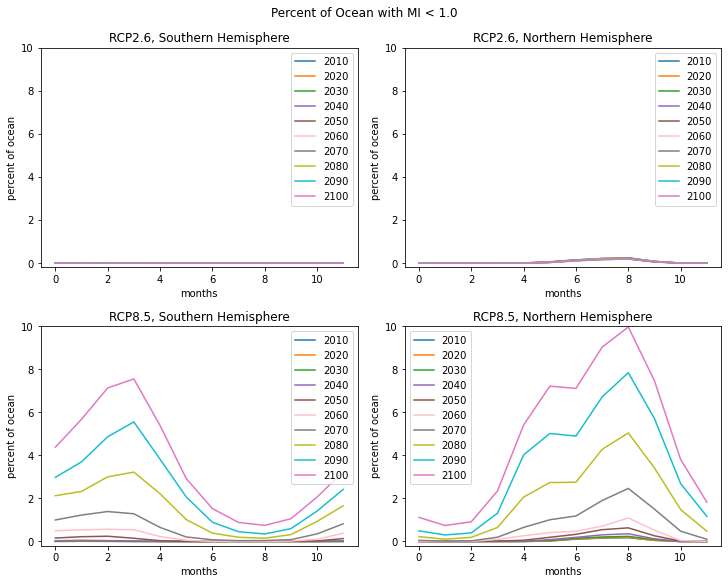

In [13]:
fig, axs = plt.subplots(figsize=(10,8), nrows=2, ncols=2, constrained_layout=True)
fig.suptitle('Percent of Ocean with MI < 1.0')
wn.filterwarnings('ignore')
func.percent_by_year(r26_S,'RCP2.6, Southern Hemisphere', axs[0,0], totalS)
axs[0,0].set_ylim(-0.2, 10)
func.percent_by_year(r26_N,'RCP2.6, Northern Hemisphere', axs[0,1], totalN)
axs[0,1].set_ylim(-0.2, 10)
func.percent_by_year(r85_S,'RCP8.5, Southern Hemisphere', axs[1,0], totalS)
axs[1,0].set_ylim(-0.2, 10)
func.percent_by_year(r85_N,'RCP8.5, Northern Hemisphere', axs[1,1], totalN)
axs[1,1].set_ylim(-0.2, 10)

(10.0, 45.0)

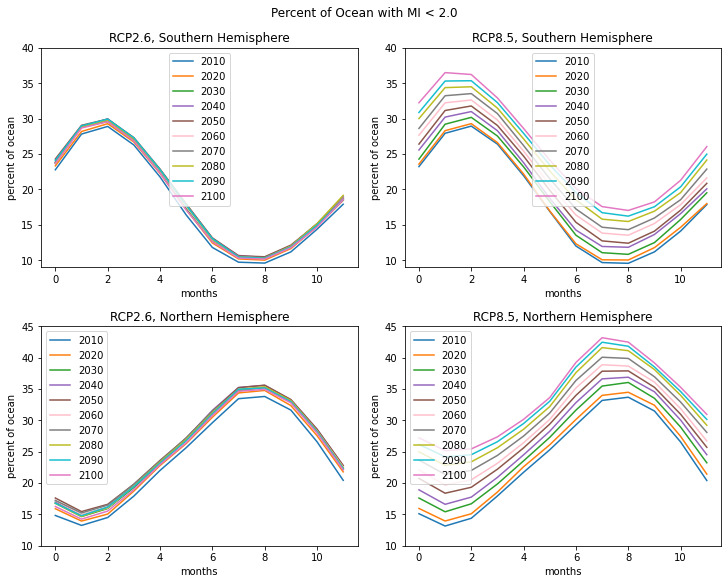

In [19]:
fig, axs = plt.subplots(figsize=(10,8), nrows=2, ncols=2, constrained_layout=True)
fig.suptitle('Percent of Ocean with MI < 2.0')
wn.filterwarnings('ignore')
func.percent_by_year(o26_S,'RCP2.6, Southern Hemisphere', axs[0,0], totalS)
axs[0,0].set_ylim(9, 40)
func.percent_by_year(o85_S,'RCP8.5, Southern Hemisphere', axs[0,1], totalS)
axs[0,1].set_ylim(9, 40)
func.percent_by_year(o26_N,'RCP2.6, Northern Hemisphere', axs[1,0], totalN)
axs[1,0].set_ylim(10, 45)
func.percent_by_year(o85_N,'RCP8.5, Northern Hemisphere', axs[1,1], totalN)
axs[1,1].set_ylim(10, 45)

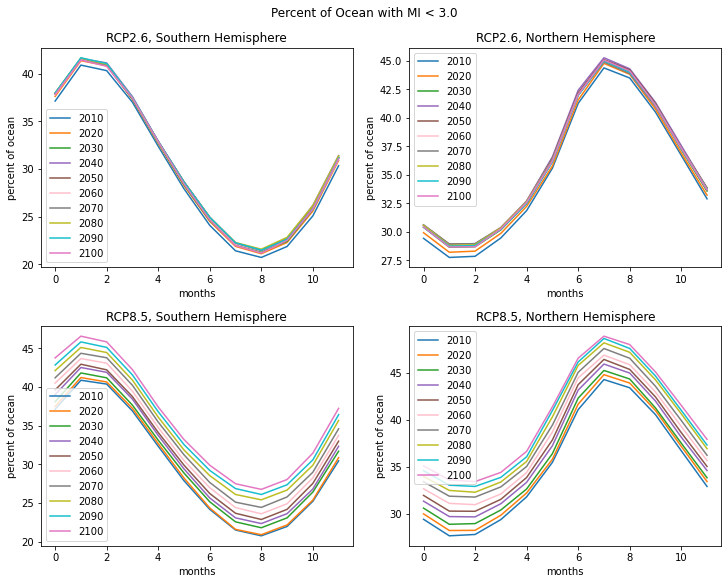

In [15]:
fig, axs = plt.subplots(figsize=(10,8), nrows=2, ncols=2, constrained_layout=True)
fig.suptitle('Percent of Ocean with MI < 3.0')
wn.filterwarnings('ignore')
func.percent_by_year(y26_S,'RCP2.6, Southern Hemisphere', axs[0,0], totalS)
func.percent_by_year(y26_N,'RCP2.6, Northern Hemisphere', axs[0,1], totalN)
func.percent_by_year(y85_S,'RCP8.5, Southern Hemisphere', axs[1,0], totalS)
func.percent_by_year(y85_N,'RCP8.5, Northern Hemisphere', axs[1,1], totalN)

Z=K11

In [7]:
rootdir = '/local/ss23/GFDL_LEs/'
experiment = 'OCN/METABOLIC_INDEX/RCP26'
filename = 'MI_hitemp_sens_k11_ens*_1x1_2006_2100.nc'
path = rootdir+experiment+'/'+filename
k11_all26 = xr.open_mfdataset(path, engine='netcdf4', concat_dim='ensemble', combine='nested')

In [13]:
experiment = 'OCN/METABOLIC_INDEX/RCP85'
filename = 'MI_hitemp_sens_k11_ens*_1x1_1950_2100.nc'
path = rootdir+experiment+'/'+filename
k11_all85 = xr.open_mfdataset(path, engine='netcdf4', concat_dim='ensemble', combine='nested')
k11_all85 = k11_all85.sel(time=slice('2006-01-01','2100-12-31'))

In [14]:
k11_avg26 = k11_all26.sel(ensemble=30)
k11_avg85 = k11_all85.sel(ensemble=30)

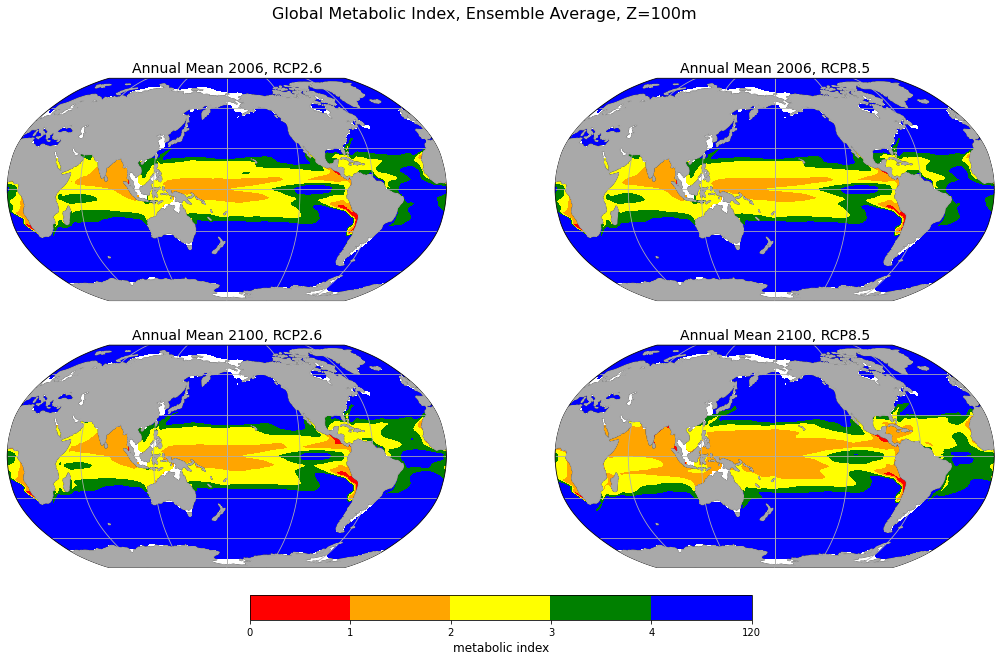

In [15]:
fig, axs = plt.subplots(figsize=(18,10), ncols=2, nrows=2, subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('Global Metabolic Index, Ensemble Average, Z=100m', fontsize=16)
wn.filterwarnings('ignore')
func.graph(k11_avg26, axs[0,0], 'Annual Mean 2006, RCP2.6', 2006, None, True)
func.graph(k11_avg85, axs[0,1], 'Annual Mean 2006, RCP8.5', 2006, None, True)
func.graph(k11_avg26, axs[1,0], 'Annual Mean 2100, RCP2.6', 2100, None, True)
im = func.graph(k11_avg85, axs[1,1], 'Annual Mean 2100, RCP8.5', 2100, None, True)
cbar = plt.colorbar(im,ax=axs,orientation='horizontal',fraction=0.05,pad=0.05,shrink=0.5)
cbar.set_label('metabolic index',fontsize=12)

In [20]:
k11_r26 = get_percent(k11_all26, 1.0, total)
k11_o26 = get_percent(k11_all26, 2.0, total)
k11_y26 = get_percent(k11_all26, 3.0, total)
k11_g26 = get_percent(k11_all26, 4.0, total)

In [21]:
k11_r85 = get_percent(k11_all85, 1.0, total)
k11_o85 = get_percent(k11_all85, 2.0, total)
k11_y85 = get_percent(k11_all85, 3.0, total)
k11_g85 = get_percent(k11_all85, 4.0, total)

Text(0.5, 1.0, 'RCP8.5')

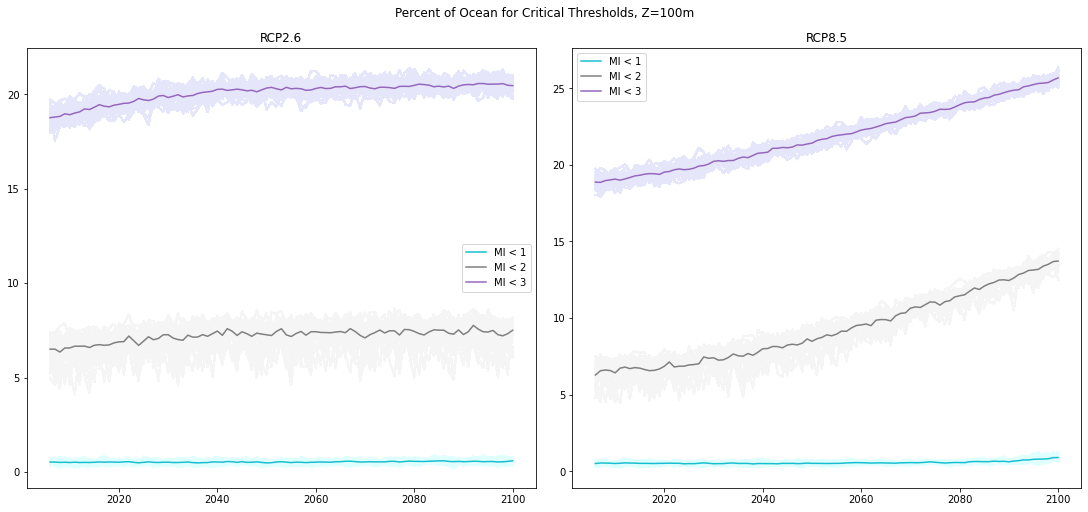

In [22]:
fig, (ax0, ax1) = plt.subplots(figsize=(15,7), ncols=2, constrained_layout=True)
fig.suptitle('Percent of Ocean for Critical Thresholds, Z=100m')
# func.percent_plot(ds_z0avg,ax,'RCP8.5 Ensemble Average Annual Means, k01',True,True,True,None,None,'k01', total)
func.plot_allEns(k11_all26, 1.0, ax0, 'lightcyan', total)
func.plot_allEns(k11_all26, 2.0, ax0, 'whitesmoke', total)
func.plot_allEns(k11_all26, 3.0, ax0, 'lavender', total)
ax0.plot(np.unique(k11_r26['time.year']),k11_r26.groupby('time.year').mean(),color='tab:cyan',label='MI < 1')
ax0.plot(np.unique(k11_o26['time.year']),k11_o26.groupby('time.year').mean(),color='tab:gray',label='MI < 2')
ax0.plot(np.unique(k11_y26['time.year']),k11_y26.groupby('time.year').mean(),color='tab:purple',label='MI < 3')
# ax0.plot(np.unique(ds_g26['time.year']),ds_g26.groupby('time.year').mean(),color='navy',label='MI < 4')
# ax0.set_ylim(-1, 40)
ax0.set_title('RCP2.6')
ax0.legend()
func.plot_allEns(k11_all85, 1.0, ax1, 'lightcyan', total)
func.plot_allEns(k11_all85, 2.0, ax1, 'whitesmoke', total)
func.plot_allEns(k11_all85, 3.0, ax1, 'lavender', total)
ax1.plot(np.unique(k11_r85['time.year']),k11_r85.groupby('time.year').mean(),color='tab:cyan',label='MI < 1')
ax1.plot(np.unique(k11_o85['time.year']),k11_o85.groupby('time.year').mean(),color='tab:gray',label='MI < 2')
ax1.plot(np.unique(k11_y85['time.year']),k11_y85.groupby('time.year').mean(),color='tab:purple',label='MI < 3')
# ax1.plot(np.unique(ds_g85['time.year']),ds_g85.groupby('time.year').mean(),color='navy',label='MI < 4')
ax1.legend()
ax1.set_title('RCP8.5')
# ax1.set_ylim(-1, 40)